In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
# image pre processing: 
# Transform: Normalize and convert to tensor
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
])

# transforms.ToTensor()
Converts the image to a tensor: Converts raw pixel values to a PyTorch-compatible format and scales them to [0, 1].

Normalizes the tensor: Adjusts the values to a range centered around 0 (e.g., [-1, 1]).

Purpose: Converts an image (e.g., from PIL format or NumPy array) into a PyTorch tensor.

What it does:

The image is scaled to have pixel values in the range [0, 1].

The shape of the image is changed to (C, H, W):

C: Channels (e.g., 1 for grayscale, 3 for RGB).

H: Height of the image.
W: Width of the image.
For example, a grayscale image of size 28×28 becomes a tensor with shape (1,28,28)

In [3]:
# Load MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

To download it, we provide the following parameters:
* `root: str` - which folder do you want to download the data to?
* `train: Bool` - do you want the training or test split?
* `download: Bool` - should the data be downloaded?
* `transform: torchvision.transforms` - what transformations would you like to do on the data?
* `target_transform` - you can transform the targets (labels) if you like too.

In [ ]:
# DataLoader for batching
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)
#This line of code sets up a pipeline that:

#Takes the training data (stored in train_dataset).

Breaks it into smaller, manageable pieces called batches (each containing 64 examples).

Randomly mixes the data every time we start training, 
so the model doesn’t see the examples in the same order every time (this is called shuffling).

torch.Size([1, 28, 28])


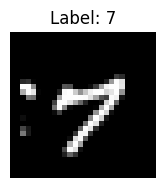

In [ ]:
# Get an iterator for the DataLoader For Visualization
examples = iter(train_loader)


# Use the built-in next() function to get a batch of data
example_data, example_targets = next(examples)
print(example_data[0].shape)
plt.subplot(2, 3,4)
plt.imshow(example_data[0][0], cmap='grey')  # Visualize the first channel (grayscale)
plt.title(f'Label: {example_targets[0]}')
plt.axis('off')
plt.show()
# example_data is a batch of 64 grayscale images, each of size 28x28 pixels.


iter(): Converts a collection (e.g., list) into an iterator so you can fetch one item at a time.

next(): Fetches the next item (in this case, the next batch) from the iterator.

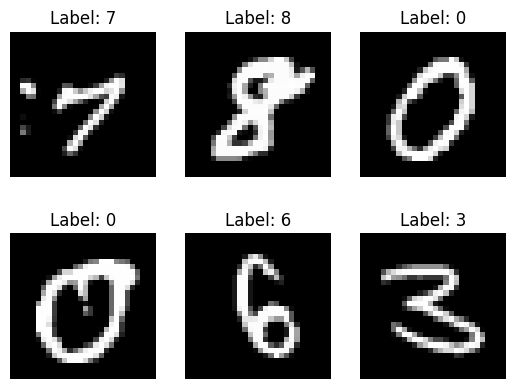

In [6]:

# Visualize the images
import matplotlib.pyplot as plt

for i in range(6):  # Display 6 images
    plt.subplot(2, 3, i + 1)
    plt.imshow(example_data[i][0], cmap='gray')  # Visualize the first channel (grayscale)
    plt.title(f'Label: {example_targets[i]}')
    plt.axis('off')
plt.show()

2. Define the CNN Model
Create a CNN with 2-3 convolutional layers, ReLU activation, and pooling.

1) A custom neural network class called CNN. 

2) It inherits from nn.Module, which is the base class for all neural networks in PyTorch.
3) The "__init__" function in a class is the constructor.
4) It is called when you create an object of the class. 
5) The parameter self refers to the instance of the class being created. 
6) It allows the class to access its own attributes and methods
7) Calling super().__init__() ensures that the child class (CNN) inherits all functionality from nn.Module.


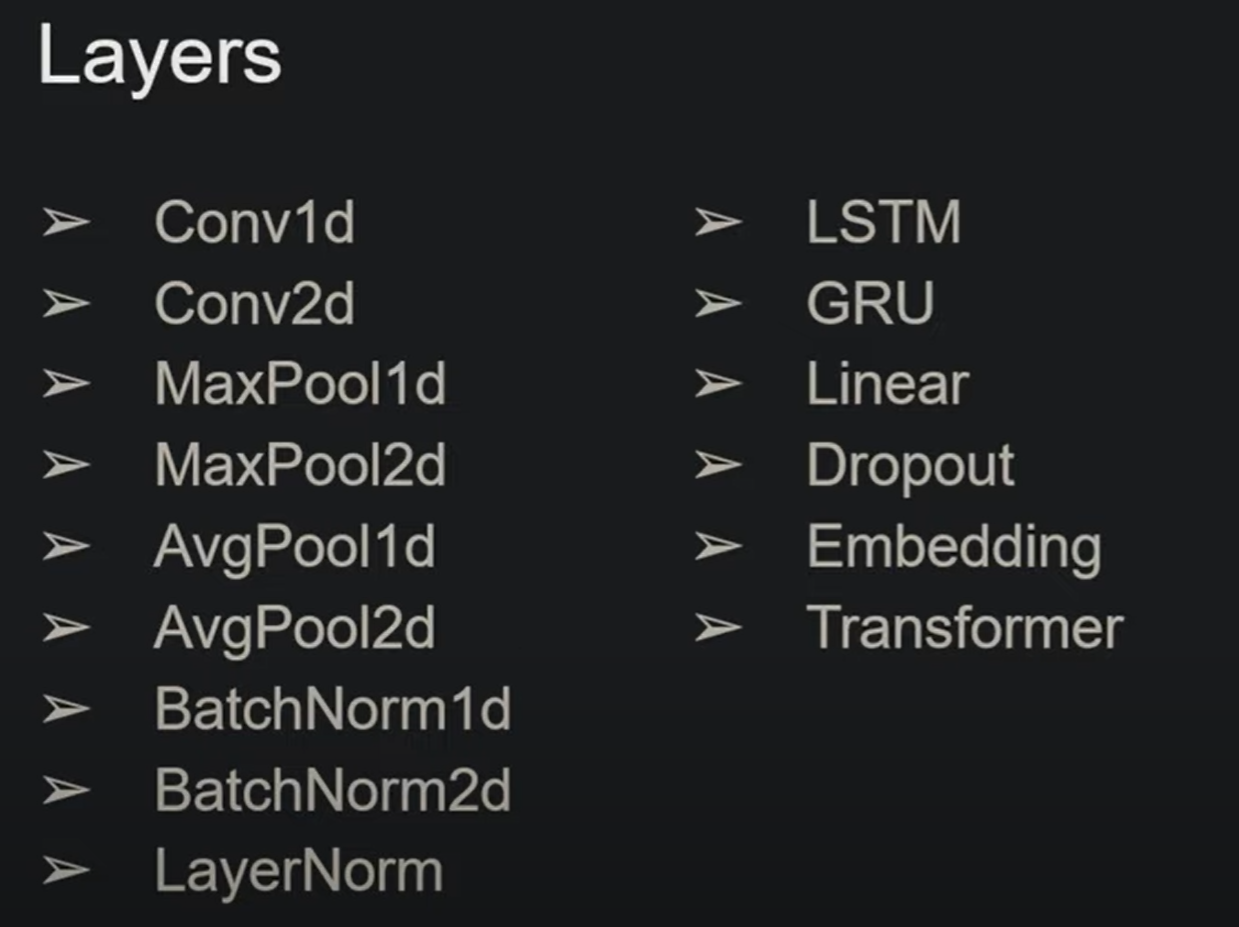

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt



class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)  # Input: 1 channel, Output: 32 filters, stride = 1, Padding = None
        #  This means the input data has 1 channel, such as a grayscale image. 
        # This layer will learn 32 different convolutional filters.
        # new size = original size−kernel size+1,
        # inputsize = 28 output size = ((28-3)/1) + 1= 26 ==> 
        # For 32 filters it is (32,26,26)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # Pooling layer
        # input_size = 26, Output size = (26-2/2) +1 = 13
        # For 32 filters it is (32,13,13)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        # input_size = 13, output_size = ((13 - 3)/1 +1 = 11 
        # After 2nd convolution Maxpooling is applied in forward pass so 
        # Shape of input = 11, Shape of output = ((11-2)/2) + 1 = 5
        # Due to 64 filters output size = (64*5*5)
        self.fc1 = nn.Linear(64 * 5 * 5, 128)  # Flatten for fully connected
        self.fc2 = nn.Linear(128, 10)
        
       

    def forward(self, x):
        #print("input size", x.shape) 
        # input size torch.Size([64, 1, 28, 28])
        x = self.pool(F.relu(self.conv1(x)))#(32,26,26)->(32,13,13)
        x = self.pool(F.relu(self.conv2(x)))
        #print("\n Before Flatenning Shape",x.shape)
        # Before Flatenning Shape torch.Size([64, 64, 5, 5])
        x = x.view(-1, 64 * 5 * 5)  # Flatten the tensor
        #print("\n After Flatenning Shape",x.shape)
        #After Flatenning Shape torch.Size([64, 1600])
        x = F.relu(self.fc1(x))
        #print("\n After First fully connected Layer", x.shape)
        # After First fully connected Layer torch.Size([64, 128])
        x = self.fc2(x)
        #print("\n After Second fully connected Layer", x.shape)
        # After Second fully connected Layer torch.Size([128, 10])
        return x
      

#model = CNN()



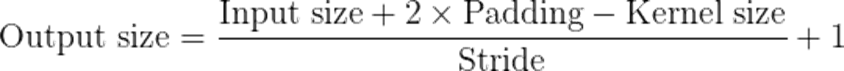



In [8]:

# Function to plot feature maps
def plot_feature_maps(feature_map, title):
    num_filters = feature_map.shape[1]  # Number of filters
    fig, axes = plt.subplots(1, min(num_filters, 8), figsize=(15, 5))
    fig.suptitle(title)
    for i in range(min(num_filters, 8)):
        axes[i].imshow(feature_map[0, i].detach().cpu().numpy(), cmap='gray')
        axes[i].axis('off')
    plt.show()

In [9]:
model = CNN()

3. Set Up Training

In [10]:
import torch.optim as optim

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
#4. Train the Model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        #print("This is shape of output after Forward Pass", outputs.shape)
        # This is shape of output after Forward Pass torch.Size([64, 10])
        # Compute loss
        loss = criterion(outputs, labels)
        #print("Loss after every forward Pass", loss.item(), loss)
        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}")


5. Evaluate the Model

In [12]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: {100 * correct / total:.2f}%')


Accuracy on test set: 98.76%


In [13]:
torch.save(model.state_dict(), 'mnist_cnn.pth')

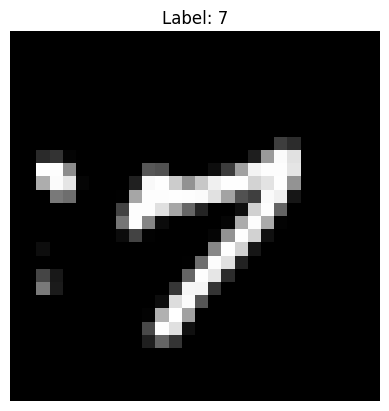

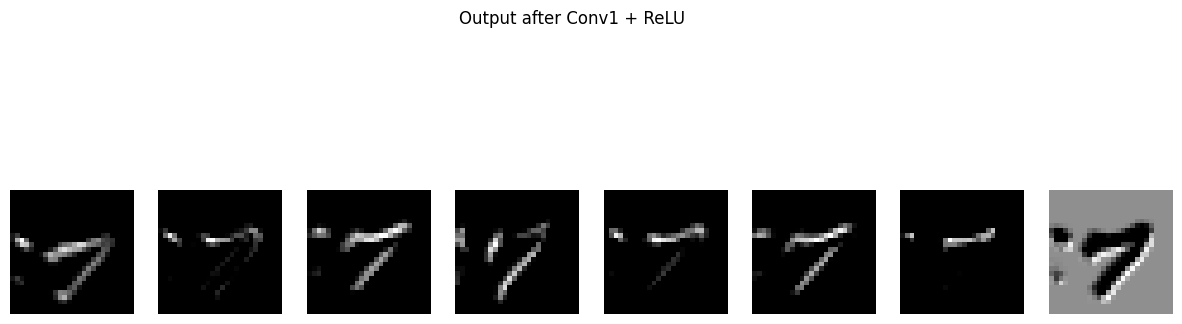

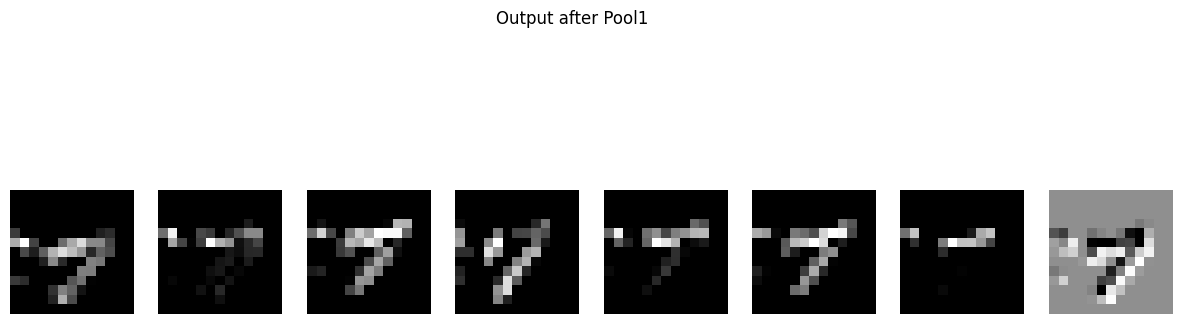

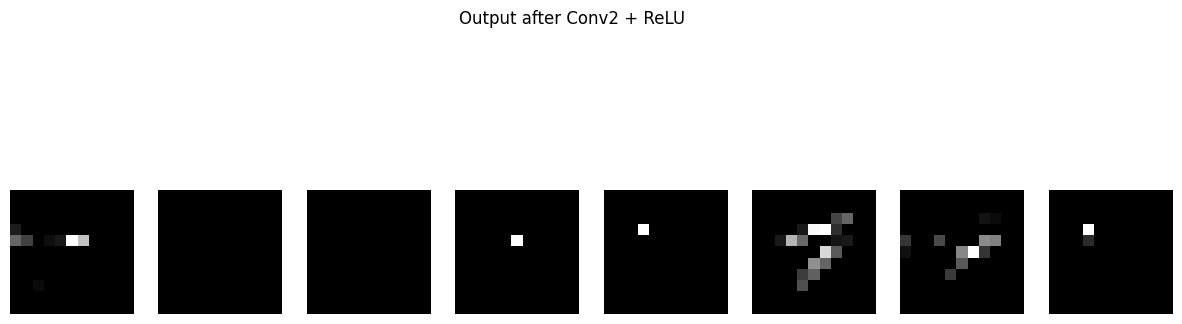

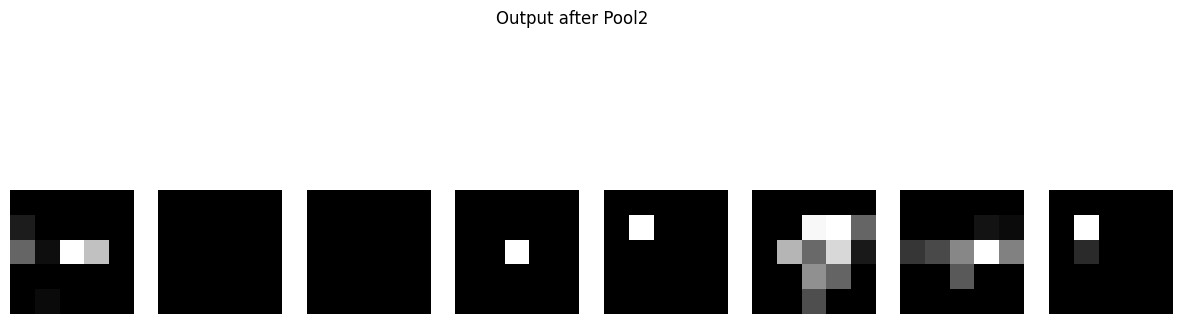

In [14]:

input_tensor = example_data[0][0] 
# Add batch and channel dimensions
input_tensor = input_tensor.unsqueeze(0).unsqueeze(0)  # Shape: [1, 1, 28, 28]

# Display the original image
plt.imshow(example_data[0][0], cmap='gray')  # Original 2D image
plt.title(f'Label: {example_targets[0]}')  # Use the corresponding label
plt.axis('off')  # Hide axes for better visualization
plt.show()
#plot_feature_maps(input_tensor, "Original Image")

# Forward pass with visualization
with torch.no_grad():
    # Step 1: First convolution + activation
    conv1_output = F.relu(model.conv1(input_tensor))
    plot_feature_maps(conv1_output, "Output after Conv1 + ReLU")

    # Step 2: First pooling
    pool1_output = model.pool(conv1_output)
    plot_feature_maps(pool1_output, "Output after Pool1")

    # Step 3: Second convolution + activation
    conv2_output = F.relu(model.conv2(pool1_output))
    plot_feature_maps(conv2_output, "Output after Conv2 + ReLU")

    # Step 4: Second pooling
    pool2_output = model.pool(conv2_output)
    plot_feature_maps(pool2_output, "Output after Pool2")